# Data Science and Business Analytics Internship
## GRIP : The Sparks Foundation
## Author : Ashlesha Datir
### Task 6 : Prediction using Decision Tree Algorithm
**Q) Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**Dataset is available at: https://bit.ly/3kXTdox**

In [1]:
# Import Important Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data set.
data = pd.read_csv('iris.csv')
print("Data Import Successfuly")

Data Import Successfuly


In [3]:
#Check top 5 records.
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Check bottom 5 records.
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# From above result we can drop "ID" column.
data.drop('Id', inplace=True,axis=1)

In [6]:
#To check number of rows and columns.
data.shape

(150, 5)

In [7]:
# To describe data (Which gives all statistical values).
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To check null values.
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**From above we can clearly says that there is no null values in our dataset**

In [9]:
# To check the full INformation about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**From above we can say that within 5 columns 4 contain float data type and 1 contain object data type.**

In [10]:
# To check the correlation between datasets.
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Visualizing our dataset
- **using Correlation Heatmap**

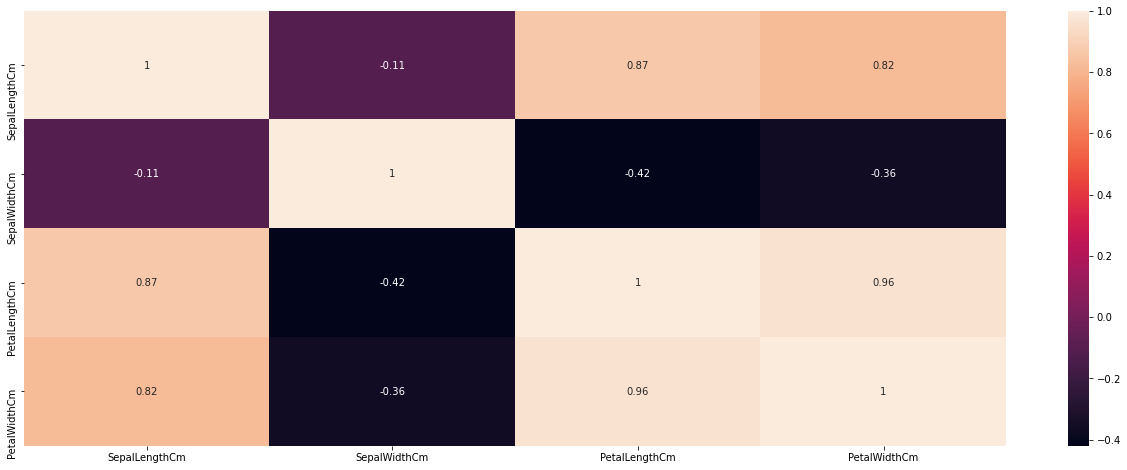

In [11]:
plt.figure(figsize=(22,8))
sns.heatmap(data.corr(), annot=True)## annot = True to print the values inside the square
plt.show()

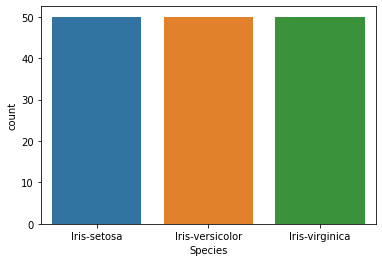

In [13]:
# We have a theree species in our dataset to check the data is balance or not
sns.countplot(x='Species',data=data)
plt.show()

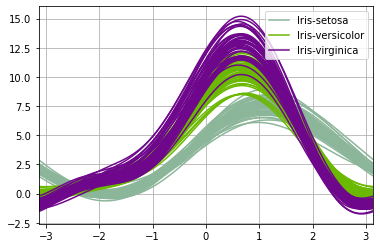

In [14]:
# Visualizing the data using pandas’ andrew curves :
from pandas.plotting import andrews_curves
andrews_curves(data, "Species")
plt.show()

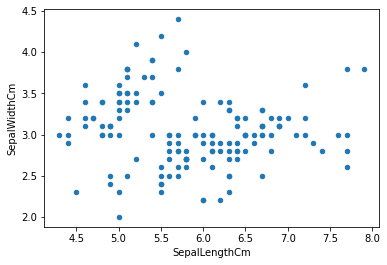

In [15]:
#Visualizing the data using matplotlib
data.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

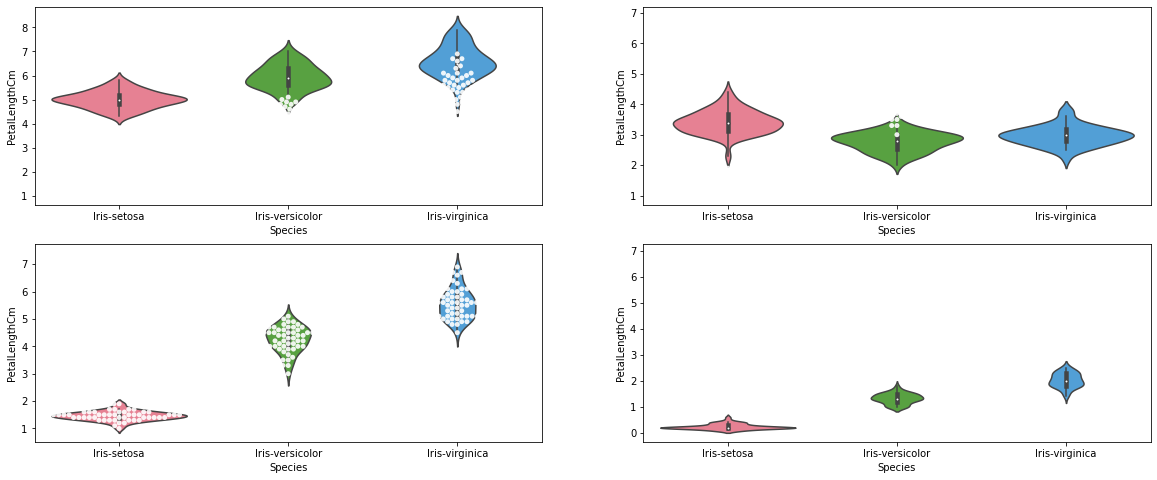

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(221);sns.violinplot(x="Species", y='SepalLengthCm', palette="husl", data=data);sns.swarmplot(x="Species", y="PetalLengthCm", data=data, color="w", alpha=.9)
plt.subplot(222);sns.violinplot(x="Species", y='SepalWidthCm', palette="husl", data=data);sns.swarmplot(x="Species", y="PetalLengthCm", data=data, color="w", alpha=.9)
plt.subplot(223);sns.violinplot(x="Species", y='PetalLengthCm', palette="husl", data=data);sns.swarmplot(x="Species", y="PetalLengthCm", data=data, color="w", alpha=.9)
plt.subplot(224);sns.violinplot(x="Species", y='PetalWidthCm', palette="husl", data=data);sns.swarmplot(x="Species", y="PetalLengthCm", data=data, color="w", alpha=.9)
plt.show

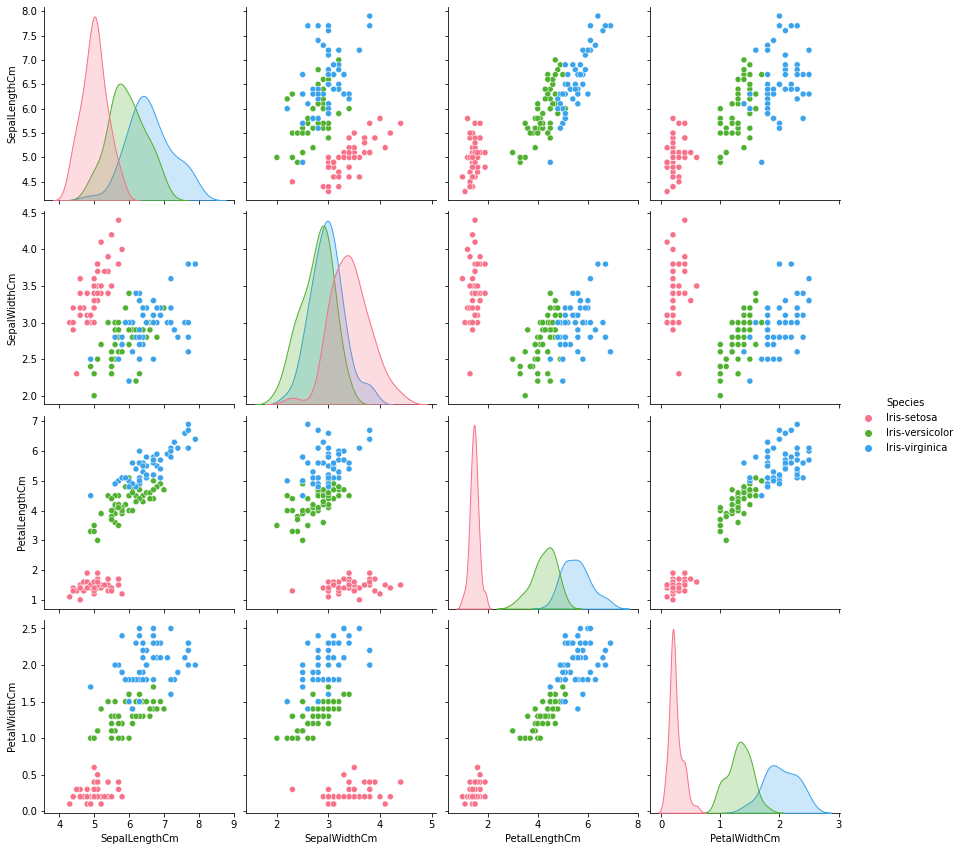

In [17]:
sns.pairplot(data=data, hue="Species", palette="husl", size=3)

In [18]:
# Apply Labels on dataset
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preprocessing the dataset :
Using an inbuilt library called ‘train_test_split’, which divides our data set into a ratio of 80:20. 80% will be used for training, evaluating, and selection among our models and 20% will be held back as a validation dataset.

In [19]:
x = data.iloc[:,:-1] #last column values excluded
y = data.iloc[:,-1:] #last column value

In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


### Training the dataset

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree

In [23]:
#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
#Build the model
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
#Draw Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [27]:
# Report of classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



- Precision – Accuracy of positive predictions.

- Recall – Fraction of positives that were correctly identified.

- F1 score – What percent of positive predictions were correct?

- macro avg – averaging the unweighted mean per label

- weighted avg – averaging the support-weighted mean per label

In [28]:
# To check Accuracy
accuracy_score(y_test,y_pred)

0.9555555555555556

Here we have got around 95% Accuracy For This Model

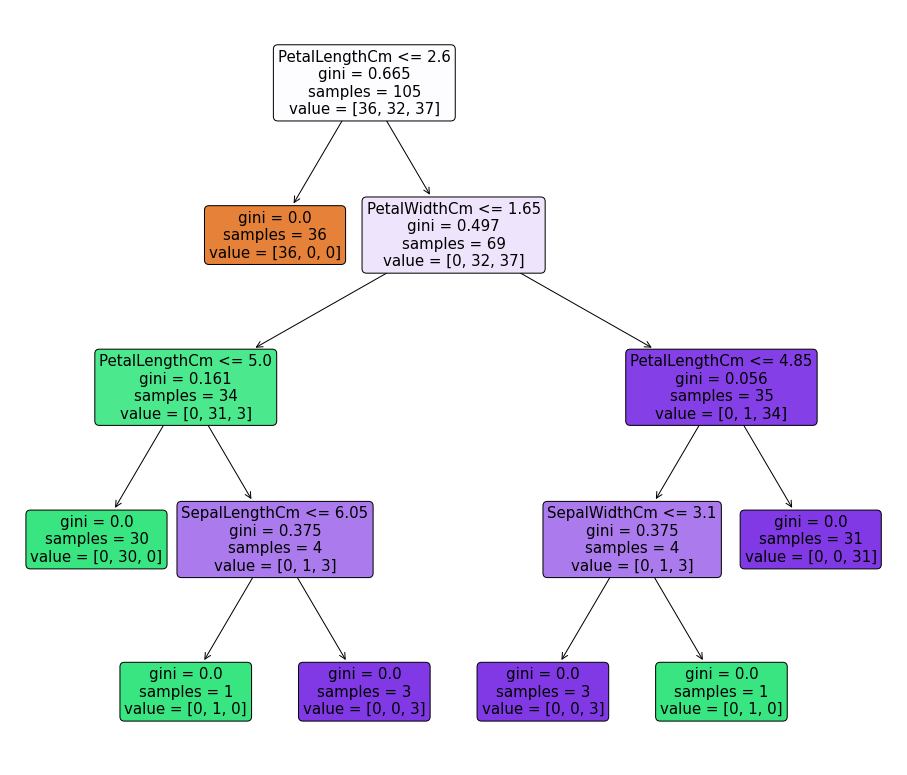

In [29]:
# Visualization decision Tree
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier,feature_names=x.columns,fontsize=15,filled=True,rounded=True)

In [30]:
# Now Prediction on New Data
new_data=pd.DataFrame({'SepalLengthCm':[3.2,2.4],'SepalWidthCm':[4.3,5.1],
                       'PetalLengthCm':[2.0,3.1],'PetalWidthCm':[0.9,0.7]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.2,4.3,2.0,0.9
1,2.4,5.1,3.1,0.7


In [31]:
new_predict = classifier.predict(new_data)

In [32]:
new_data['Predicted Species'] = new_predict
new_data  #Here 0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.2,4.3,2.0,0.9,0
1,2.4,5.1,3.1,0.7,1


**This is prediction of new data**

Now we can test any data to this classifier and it would be able to predict the right class accordingly.